<a href="https://colab.research.google.com/github/SuriyaG09/Machine-Learning-concepts-as-/blob/main/Cleaning_and_visualizaiton_of_pumpkin_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleaning the pumpkin dataset

- Predict the price of a pumpkin for sale during a given month

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('/content/US-pumpkins.csv')
df.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


-  there are a lot of null values which could affect in the process of model creation.

In [21]:
df.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

- the important columns like pakages, date and prices dont have null values

In [22]:
# required data from the csv

req = ['Package', 'Low Price', 'High Price']

da = df.loc[:, req]
da.head()

,Package,Low Price,High Price
0,24 inch bins,270.0,280.0
1,24 inch bins,270.0,280.0
2,24 inch bins,160.0,160.0
3,24 inch bins,160.0,160.0
4,24 inch bins,90.0,100.0


- add more data from the data

In [23]:
price = (da['Low Price'] + da['High Price'])/2

price

0       275.00
1       275.00
2       160.00
3       160.00
4        95.00
         ...  
1752     14.75
1753    275.00
1754    275.00
1755    275.00
1756    275.00
Length: 1757, dtype: float64

In [24]:
month = pd.DatetimeIndex(df['Date']).month

In [25]:
f = pd.DataFrame({'Month':month, 'Package': da['Package'], 'Low_Price': da['Low Price'], 'High_Price': da['High Price'], 'Price': price})

In [26]:
f.head()

,Month,Package,Low_Price,High_Price,Price
0,4,24 inch bins,270.0,280.0,275.0
1,5,24 inch bins,270.0,280.0,275.0
2,9,24 inch bins,160.0,160.0,160.0
3,9,24 inch bins,160.0,160.0,160.0
4,11,24 inch bins,90.0,100.0,95.0


- taking only the unit -- bushel

In [46]:
da = da[da['Package'].str.contains('bushel', case=True, regex=True)]

In [47]:
da

,Package,Low Price,High Price
70,1 1/9 bushel cartons,15.00,15.0
71,1 1/9 bushel cartons,18.00,18.0
72,1 1/9 bushel cartons,18.00,18.0
73,1 1/9 bushel cartons,17.00,17.0
74,1 1/9 bushel cartons,15.00,15.0
...,...,...,...
1738,1/2 bushel cartons,15.00,15.0
1739,1/2 bushel cartons,13.75,15.0
1740,1/2 bushel cartons,10.75,15.0
1741,1/2 bushel cartons,12.00,12.0


In [48]:
f.loc[f['Package'].str.contains('1 1/9'), 'Price'] = price/(1+ 1/9)

In [49]:
f.loc[f['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [50]:
f

,Month,Package,Low_Price,High_Price,Price
70,9,1 1/9 bushel cartons,15.00,15.0,12.15
71,9,1 1/9 bushel cartons,18.00,18.0,14.58
72,10,1 1/9 bushel cartons,18.00,18.0,14.58
73,10,1 1/9 bushel cartons,17.00,17.0,13.77
74,10,1 1/9 bushel cartons,15.00,15.0,12.15
...,...,...,...,...,...
1738,9,1/2 bushel cartons,15.00,15.0,60.00
1739,9,1/2 bushel cartons,13.75,15.0,57.50
1740,9,1/2 bushel cartons,10.75,15.0,51.50
1741,9,1/2 bushel cartons,12.00,12.0,48.00


## Plotting the data

In [44]:
import matplotlib.pyplot as plt

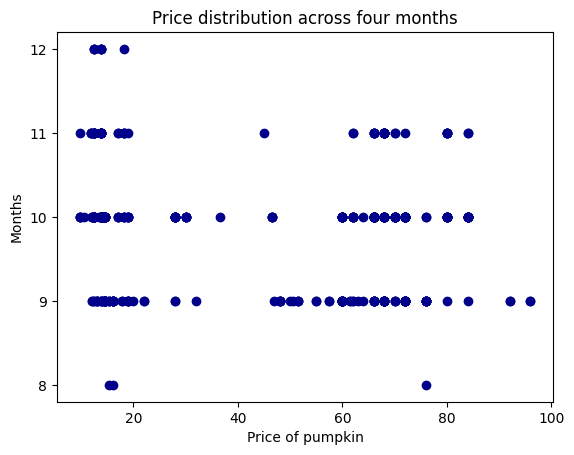

In [64]:
price = f.Price
months = f.Month

plt.scatter(price, months, color = 'darkblue')
plt.xlabel('Price of pumpkin')
plt.ylabel('Months')
plt.title('Price distribution across four months')
plt.yticks([8,9,10,11,12])
plt.show()

- can't really able to get any insights from it .. need a different chart

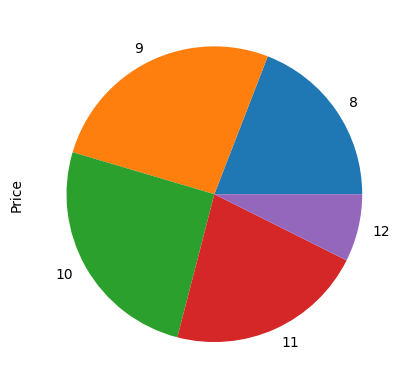

In [73]:
f.groupby(['Month'])['Price'].mean().plot(kind='pie')
plt.show()

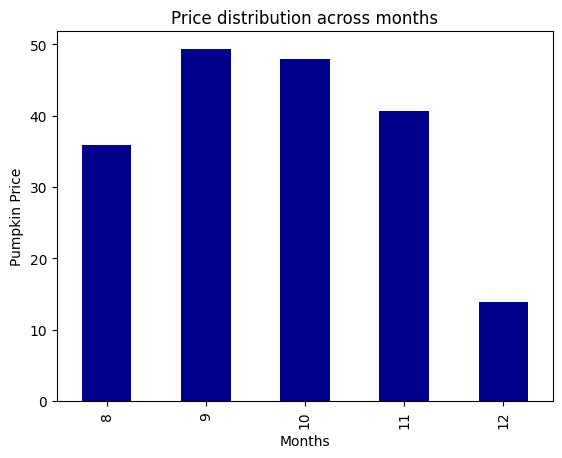

In [82]:
f.groupby(['Month'])['Price'].mean().plot(kind='bar', color = 'darkblue')
plt.ylabel('Pumpkin Price')
plt.xlabel('Months')
plt.title('Price distribution across months')
plt.show()

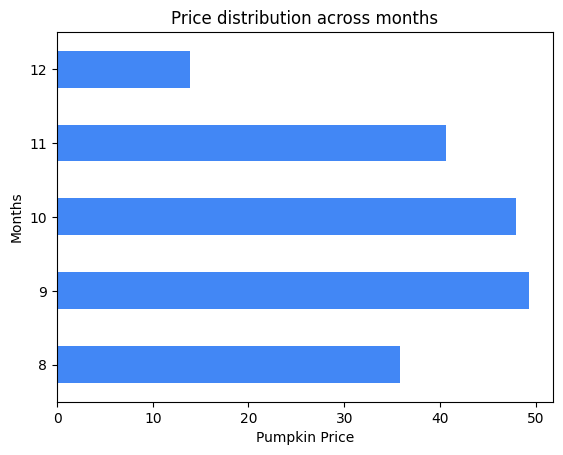

In [89]:
f.groupby(['Month'])['Price'].mean().plot(kind='barh', color = '#4287f5')
plt.xlabel('Pumpkin Price')
plt.ylabel('Months')
plt.title('Price distribution across months')
plt.show()